# Phase 3 project

## Covid Dataset

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df_covid=pd.read_csv('Covid Data.csv')

In [3]:
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


### Copying description from Kaggle

About Dataset
Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

### content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

I need to decide which one should be the target variable. The possible ones are:
'classification', 'patient type', 'usmr', 'medical unit', 'icu', 'date died'

In [4]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [5]:
df_covid['USMER'].value_counts

<bound method IndexOpsMixin.value_counts of 0          2
1          2
2          2
3          2
4          2
          ..
1048570    2
1048571    1
1048572    2
1048573    2
1048574    2
Name: USMER, Length: 1048575, dtype: int64>

In [6]:
df_covid['USMER'].value_counts(normalize=True)

2    0.632194
1    0.367806
Name: USMER, dtype: float64

In [7]:
df_covid['CLASIFFICATION_FINAL'].value_counts(normalize=True)

7    0.476122
3    0.363853
6    0.122197
5    0.024882
1    0.008203
4    0.002977
2    0.001765
Name: CLASIFFICATION_FINAL, dtype: float64

I would need to do a groupby here because values 1-3 mean they had covid, 4 and up no covid.
I think whichever target variable I choose I have to remove all the other info we have about the patient having covid.

In [8]:
df_covid['PATIENT_TYPE'].value_counts(normalize=True)

1    0.809235
2    0.190765
Name: PATIENT_TYPE, dtype: float64

This could be good but it is imbalanced. But maybe even like this it is ok.

In [9]:
df_covid['MEDICAL_UNIT'].value_counts(normalize=True)

12    0.575061
4     0.299840
6     0.038704
9     0.036350
3     0.018287
8     0.009917
10    0.007508
5     0.006908
11    0.005319
13    0.000950
7     0.000850
2     0.000161
1     0.000144
Name: MEDICAL_UNIT, dtype: float64

In [10]:
# Not very informative

In [11]:
df_covid['ICU'].value_counts(normalize=True)

97    0.809235
2     0.167546
1     0.016077
99    0.007141
Name: ICU, dtype: float64

In [12]:
# Mostly missing values

In [13]:
df_covid['DATE_DIED'].value_counts(normalize=True)

9999-99-99    9.266223e-01
06/07/2020    9.536752e-04
07/07/2020    9.498605e-04
13/07/2020    9.441385e-04
16/06/2020    9.336480e-04
                  ...     
24/03/2021    9.536752e-07
30/10/2020    9.536752e-07
10/01/2021    9.536752e-07
11/01/2021    9.536752e-07
13/04/2021    9.536752e-07
Name: DATE_DIED, Length: 401, dtype: float64

In [14]:
# Mostly missing values

Stays standing 'classification', 'patient type'

To make the decision between these two variables we did some research to gain some domain knowledge and spoke directly to some first responders during the covid 19 pandemic, that suggested that the information about whether or not a patient needed to be hospitalized was more valuable than the results of the covid test.
This is the case since some patients might have tested positive for covid 19, but because of mild symptoms and overall good health were sent back home to be treated, and what actually really put a strain on health structures was the number of people in need to be hospitalized. Because of this we are going to use 'patient type' as our target for this study.
We are also going to drop all the other variables related to hospitalization since those contain knowledge about the hospitalization of the patient, while what we are trying to predict is the amout of people that would need to be hospitalized, based on previous knowledge so this is not a type of information we would have, if we wanted to use the model again on other data.

So target should be patient type and all the other hospital related variables should be dropped.

In [15]:
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [16]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [17]:
df=df_covid.drop(['USMER', 'MEDICAL_UNIT', 'INTUBED', 'CLASIFFICATION_FINAL', 'ICU', 'DATE_DIED'], axis=1)

In [18]:
df

,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2
1,2,1,1,72,97,2,2,2,2,1,2,2,1,1,2
2,2,2,2,55,97,1,2,2,2,2,2,2,2,2,2
3,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2
4,2,1,2,68,97,1,2,2,2,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,1,2,40,97,2,2,2,2,2,2,2,2,2,2
1048571,2,2,2,51,97,2,2,2,2,1,2,2,2,2,2
1048572,2,1,2,55,97,2,2,2,2,2,2,2,2,2,2
1048573,2,1,2,28,97,2,2,2,2,2,2,2,2,2,2


The missing values are catalogued as 97 or 99. So I have to look for these values to understand how many null values.

In [19]:
df['SEX'].value_counts(normalize=True)

1    0.500741
2    0.499259
Name: SEX, dtype: float64

In [20]:
df['PREGNANT'].value_counts(normalize=True)

97    0.499259
2     0.489406
1     0.007754
98    0.003580
Name: PREGNANT, dtype: float64

Will need to find a way to replace the missing values for pregnant.

In [21]:
for i in df.columns:
    print(i,'\n', df[i].value_counts(normalize=True))

SEX 
 1    0.500741
2    0.499259
Name: SEX, dtype: float64
PATIENT_TYPE 
 1    0.809235
2    0.190765
Name: PATIENT_TYPE, dtype: float64
PNEUMONIA 
 2     0.851188
1     0.133551
99    0.015262
Name: PNEUMONIA, dtype: float64
AGE 
 30     2.575877e-02
31     2.472594e-02
28     2.414038e-02
29     2.396967e-02
34     2.371981e-02
           ...     
115    1.907350e-06
114    1.907350e-06
113    9.536752e-07
111    9.536752e-07
121    9.536752e-07
Name: AGE, Length: 121, dtype: float64
PREGNANT 
 97    0.499259
2     0.489406
1     0.007754
98    0.003580
Name: PREGNANT, dtype: float64
DIABETES 
 2     0.877618
1     0.119199
98    0.003183
Name: DIABETES, dtype: float64
COPD 
 2     0.982772
1     0.014364
98    0.002864
Name: COPD, dtype: float64
ASTHMA 
 2     0.967050
1     0.030109
98    0.002841
Name: ASTHMA, dtype: float64
INMSUPR 
 2     0.983240
1     0.013514
98    0.003246
Name: INMSUPR, dtype: float64
HIPERTENSION 
 2     0.841849
1     0.155191
98    0.002960
Name: HIPERT

97, 98 and 99 represent missing values for all the columns except 'AGE'.
<br>For some categories the missing values are so little that it's worth just dropping them. For the two categories with the most missing values, 'PREGNANT' and 'PNEUMONIA' I will proceed to impute them.
<br>I want to replace them but since most values are categorical I want to replace them not just with the mode but keeping the same percentage of values from the original data.
<br>We will use the percentages that we see in the above value counts.

In [22]:
age=df['AGE']

In [23]:
df.drop('AGE', axis=1, inplace=True)

In [24]:
for i in df.columns:
    df[i]=df[i].replace([97,98,99], np.NaN)

In [25]:
df.isna().sum()

SEX                    0
PATIENT_TYPE           0
PNEUMONIA          16003
PREGNANT          527265
DIABETES            3338
COPD                3003
ASTHMA              2979
INMSUPR             3404
HIPERTENSION        3104
OTHER_DISEASE       5045
CARDIOVASCULAR      3076
OBESITY             3032
RENAL_CHRONIC       3006
TOBACCO             3220
dtype: int64

In [26]:
"""I could replace the missing values using percentages OR I could do it using KNN OR I could do it direclty in the decision tree/random forest.
For now let me replace them in this easier percentage way, then if I have time later I will try the other two ways."""

'I could replace the missing values using percentages OR I could do it using KNN OR I could do it direclty in the decision tree/random forest.\nFor now let me replace them in this easier percentage way, then if I have time later I will try the other two ways.'

In [27]:
df['PREGNANT'] =df['PREGNANT'].fillna(pd.Series(np.random.choice([1, 2], 
                                    p=[0.02,0.98],size=len(df))))

In [28]:
df['PNEUMONIA'] =df['PNEUMONIA'].fillna(pd.Series(np.random.choice([1, 2], 
                                    p=[0.14,0.86],size=len(df))))

In [29]:
df=pd.concat([df, age], axis=1)

In [30]:
df.dropna(inplace=True)

In [31]:
df.isna().sum()

SEX               0
PATIENT_TYPE      0
PNEUMONIA         0
PREGNANT          0
DIABETES          0
COPD              0
ASTHMA            0
INMSUPR           0
HIPERTENSION      0
OTHER_DISEASE     0
CARDIOVASCULAR    0
OBESITY           0
RENAL_CHRONIC     0
TOBACCO           0
AGE               0
dtype: int64

In [32]:
df

,SEX,PATIENT_TYPE,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE
0,1,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,65
1,2,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,72
2,2,2,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,55
3,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,53
4,2,1,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,40
1048571,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,51
1048572,2,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,55
1048573,2,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,28


Now to follow the usual convention of one hot encoding I want to change the values 2 which means no into 0.
<br>This is true for all the columns except our target, 'PATIENT_TYPE' where 1 means they returned home and 2 means they were hospitalized. I will do this separately, and then assign the column to y.
For X I will do the necessary changes to df and then concat with 'AGE' that I dropped before.
<br>For sex it is going to be 1 for female and 0 for male.

In [33]:
y=df['PATIENT_TYPE']

In [34]:
#I have to redifine age again because the old onw has some null values that I dropped.
age=df['AGE']

In [35]:
df.drop(['PATIENT_TYPE','AGE'], axis=1, inplace=True)

In [36]:
df=df.replace(2, 0)

In [37]:
df

,SEX,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048571,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1048572,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048573,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
for i in df.columns:
    print(i,'\n', df[i].value_counts(normalize=True))

SEX 
 1    0.501223
0    0.498777
Name: SEX, dtype: float64
PNEUMONIA 
 0.0    0.865646
1.0    0.134354
Name: PNEUMONIA, dtype: float64
PREGNANT 
 0.0    0.982186
1.0    0.017814
Name: PREGNANT, dtype: float64
DIABETES 
 0.0    0.880903
1.0    0.119097
Name: DIABETES, dtype: float64
COPD 
 0.0    0.985699
1.0    0.014301
Name: COPD, dtype: float64
ASTHMA 
 0.0    0.969851
1.0    0.030149
Name: ASTHMA, dtype: float64
INMSUPR 
 0.0    0.98656
1.0    0.01344
Name: INMSUPR, dtype: float64
HIPERTENSION 
 0.0    0.844846
1.0    0.155154
Name: HIPERTENSION, dtype: float64
OTHER_DISEASE 
 0.0    0.973249
1.0    0.026751
Name: OTHER_DISEASE, dtype: float64
CARDIOVASCULAR 
 0.0    0.980277
1.0    0.019723
Name: CARDIOVASCULAR, dtype: float64
OBESITY 
 0.0    0.847613
1.0    0.152387
Name: OBESITY, dtype: float64
RENAL_CHRONIC 
 0.0    0.982013
1.0    0.017987
Name: RENAL_CHRONIC, dtype: float64
TOBACCO 
 0.0    0.919502
1.0    0.080498
Name: TOBACCO, dtype: float64


Changing to zero and 1 for the target:

In [39]:
y=y.replace(1,0)
y=y.replace(2, 1)
y

0          0
1          0
2          1
3          0
4          0
          ..
1048570    0
1048571    1
1048572    0
1048573    0
1048574    0
Name: PATIENT_TYPE, Length: 1041013, dtype: int64

In [40]:
y.value_counts()

0    844063
1    196950
Name: PATIENT_TYPE, dtype: int64

In [41]:
X=pd.concat([df,age], axis=1)

In [42]:
X

,SEX,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE
0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,65
1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,72
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53
4,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
1048571,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,51
1048572,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
1048573,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28


At this point I took care of the missing values and I don't need to do one hot encoding.
<br>I have my X and y, I can divide in train and test and start trying some models.
<br>But if I want to use KNN first (and I do) I have to scale first, specifically age needs to be scaled.

In [43]:
"""Another thing I could try later to improve the model is instead of scaling the age to divide it into bins. Like 10 years for each bin and one hot encode that."""

'Another thing I could try later to improve the model is instead of scaling the age to divide it into bins. Like 10 years for each bin and one hot encode that.'

In [44]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [64]:
# Instantiate StandardScaler
scaler = MinMaxScaler()
# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert into a DataFrame
X_train = pd.DataFrame(scaled_data_train, columns=X.columns)
X_train.head()

,SEX,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,AGE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241667
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258333
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.441667


In [93]:
#Create the tree
clf = DecisionTreeClassifier(criterion='entropy')

In [94]:
# fit the tree
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
"""# plot the tree
fig, axes = plt.subplots()#nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()"""

"# plot the tree\nfig, axes = plt.subplots()#nrows = 1,ncols = 1, figsize = (3,3), dpi=300)\ntree.plot_tree(clf,\n               feature_names = X_train.columns, \n               class_names=np.unique(y).astype('str'),\n               filled = True)\nplt.show()"

In [95]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [98]:
# Evaluate the tree
print("For the train with decision tree:\n")
y_preds_train = clf.predict(X_train)
print_metrics(y_train, y_preds_train)

For the train with decision tree:

Precision Score: 0.8407183573177232
Recall Score: 0.6301033189345827
Accuracy Score: 0.9074426295438157
F1 Score: 0.7203312757599799


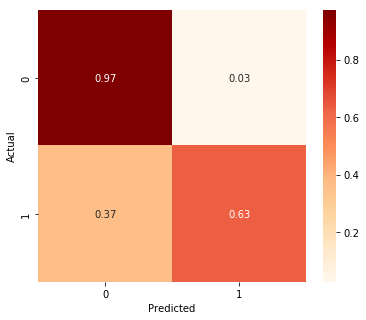

In [105]:
cm = confusion_matrix(y_train, y_preds_train)
# Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap="OrRd")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [144]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    #not sure why when I add np.sort in front of model feature it changes
    lt.barh(range(n_features), (model.feature_importances_), align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

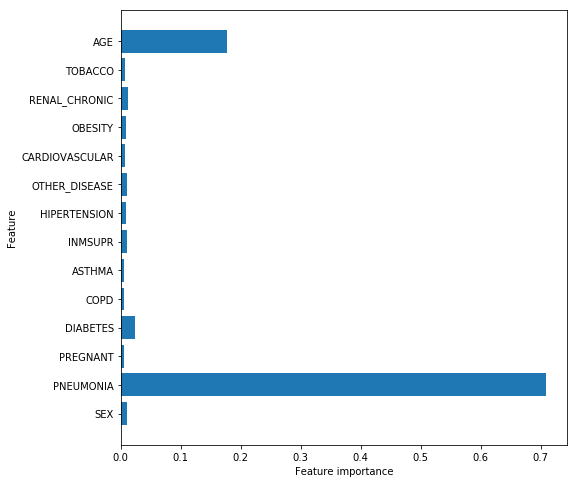

In [145]:
plot_feature_importances(clf)

### Feature importance (maybe better to do it later with most accurate model)

In [139]:
# Feature Importance
feature_used = df.columns
for fi, feature in zip(clf.feature_importances_, feature_used):
    print(fi, feature)

0.010726933530886296 SEX
0.7083084782921195 PNEUMONIA
0.005801584155652558 PREGNANT
0.023094892671926284 DIABETES
0.005111151877537224 COPD
0.0059464432578482905 ASTHMA
0.010828030673953618 INMSUPR
0.008437081723786549 HIPERTENSION
0.009795872668531607 OTHER_DISEASE
0.006400419880028467 CARDIOVASCULAR
0.008821592187882702 OBESITY
0.012353556845034783 RENAL_CHRONIC
0.007508941814741319 TOBACCO


In [65]:
print(f'Decision Tree has {clf.tree_.node_count} nodes with a maximum depth of {clf.tree_.max_depth}.')

print(f'Model Accuracy for train data: {clf.score(X_train, y_train)}')

Decision Tree has 37999 nodes with a maximum depth of 31.
Model Accuracy for train data: 0.4103122730573711


This is not so bad as a result. But given our situation I would actually like to have a higher recall than accuracy. With a high recall it means I am getting more false positives because I am decreasing the thershold, but that is what I want most times in 'medical situations', because I would rather have a false positive than a false negative.

### Class Imbalance
<br> One thing we have not considered yet is the fact that the classes of our target (patients sent home vs. patients hospitalized) are not balanced. They are not present equally in our dataset but around 80% of the patients were sent home and only 20% were hospitalized, as we saw from the split of the data for that column.
<br> This means that a very basic model that simply predicts all the patients to be sent home would have an 80% accuracy, that's the baseline.
<br> We have a way to counteract this problem by balancing the classes with a decision tree and that is what we are going to do.

In [87]:
clf_bal = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')

In [88]:
clf_bal.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

In [104]:
# Evaluate the tree
print("Results with Decision Tree considering class imbalance:\n")
ypreds_train_bal = clf_bal.predict(X_train)
print_metrics(y_train, ypreds_train_bal)

Results with Decision Tree considering class imbalance:

Precision Score: 0.633515553458945
Recall Score: 0.7728608376552154
Accuracy Score: 0.8724535996383007
F1 Score: 0.6962849553041786


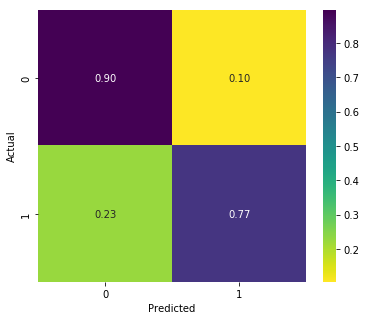

In [111]:
cm = confusion_matrix(y_train, ypreds_train_bal)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='viridis_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

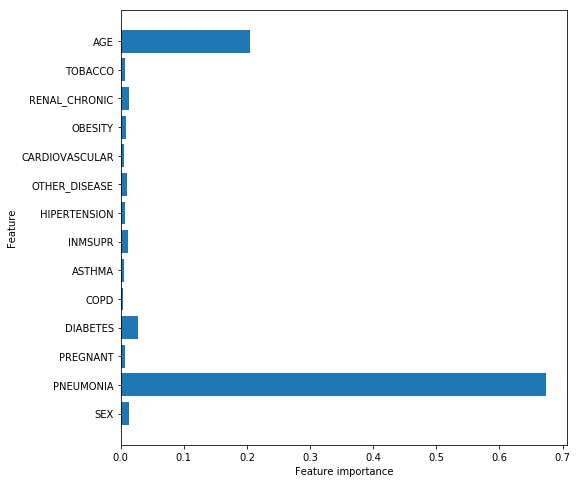

In [146]:
plot_feature_importances(clf_bal)

As we can see from the confusion matrix we started to have more False Positives and the predictions of the majority class (0, people returned home) has decreased. This reflects also in the accuracy score and F1 score.
<br> But on the bright side the predictions for the minority class (1, hospitalized) have improved, with less false negatives and a recall that went from 0.63 to 0.77.
<br> This is a matter of choice for the stakeholder, which model to use. The Decision tree without class imbalance leads to an overall more precise model: less falses overall, negative and positive, more patients categorized correctly.
<br> On the other hand the model that accounts for class imbalance makes more mistakes, has lower accurcay precision and F1 score, but it has overall less false negatives.
<br>Given the specific problem we would recommend staying on the safer side, trying to minimize the false negatives then the false positives, because it would be less of a loss to be prepared for one extra patient that doesn't ultimately need to be hospitalized, rather then not being ready with the equippment for one that actually needs to be.

### Logistic Regression
<br> Another simple model that we can try is Logistic Regression. I works similarly to Linear Regression but it can make predictions on categorical data, splitting continuous intervals into beams.

In [99]:
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=500)

Making predictions using the Train.

In [100]:
y_preds_train_log = logreg.predict(X_train)

In [103]:
print("Results for Logistic Regression:\n")

print_metrics(y_train, y_preds_train_log)

Results for Logistic Regression:

Precision Score: 0.8133660387837275
Recall Score: 0.5949437365434874
Accuracy Score: 0.8975496920304473
F1 Score: 0.6872167455901272


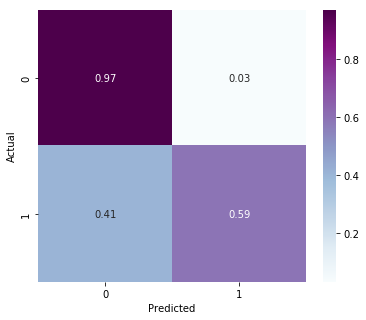

In [115]:
cm = confusion_matrix(y_train, y_preds_train_log)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='BuPu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

The decision tree model performed better than the Logistic Regression model for every metric. So we are going to stick to that and actually use an ensemble of trees to predict our results even more accurately. To train the model on different trees what we used is a Random Forest.

### Random Forest

In [122]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(random_state=19)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=19)

In [125]:
# Training accuracy score
forest.score(X_train, y_train)

0.9074413487388554

In [126]:
ypreds_train_for=forest.predict(X_train)

In [128]:
print("Random Forest Vanilla Results:")
print_metrics(y_train, ypreds_train_for)

Random Forest Vanilla Results:
Precision Score: 0.8337462834489594
Recall Score: 0.6379233300383215
Accuracy Score: 0.9074413487388554
F1 Score: 0.7228065330295429


In [ ]:
cm = confusion_matrix(y_train, y_preds_train_for)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Spectral')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [150]:
# This should be the accuracy
mean_rf_cv_score = np.mean(cross_val_score(forest, X_train, y_train, cv=3))

In [151]:
mean_rf_cv_score

0.8965019935729206

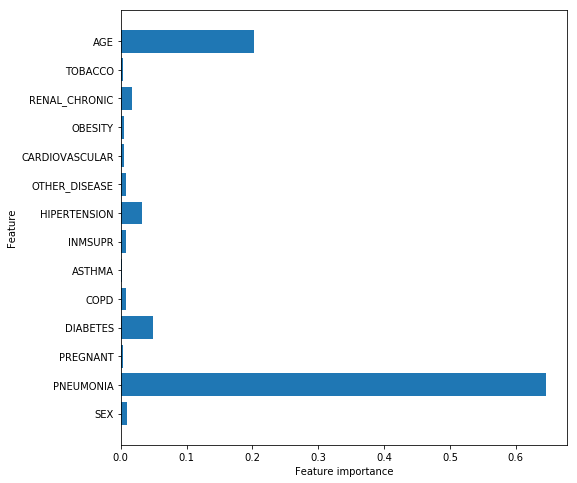

In [152]:
plot_feature_importances(forest)

### GridSearchCV:

In [153]:
# create the grid with parameters:

rf_param_grid = { 'n_estimators':[10,30,100],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 2,6,10],
                 'min_samples_split':[5, 10],
                 'min_samples_leaf':[3, 6]
    
}

In [156]:
rf_grid_search = GridSearchCV(forest, rf_param_grid,cv=3)
rf_grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=19),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 30, 100]})

In [157]:
print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 89.98%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 30}


### Best Forest

Then I will run a forest with those best parameters we just found:

In [ ]:
best_forest = RandomForestClassifier(n_estimators= , criterion= , 
                                max_depth= , min_samples_split= , 
                                min_samples_leaf= , random_state=19)
best_forest.fit(X_train, y_train)

In [ ]:
ypreds_train_bestfor = best_forest.predict(X_train)

In [ ]:
print("Results for Logistic Regression:\n")

print_metrics(y_train, ypreds_train_bestfor)

In [ ]:
cm = confusion_matrix(y_train, ypreds_train_bestfor)
# Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cmn, annot=True, fmt='.2f', cmap='flag')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

Since it took forever to run this random forest I will probably want to pickle the model so I don't have to do this again.

In [158]:
filename = 'CVforest_model.pkl'

In [159]:
# save the model to disk

joblib.dump(rf_grid_search, filename)

['CVforest_model.pkl']

In [ ]:
# some time later...

# load the model from disk
loaded_model = joblib.load(filename)

### Threshold Chapter (we will see if it makes sense to include it)

Now I have to figure out how to decrease this famous threshold in decision trees.

First ROC curve

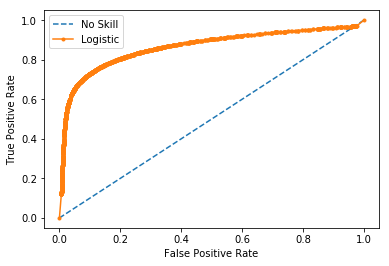

In [54]:
yhat = clf.predict_proba(X_test)
yhat = yhat[:, 1]
#fpr, tpr, thresholds= roc_curve(y_train, yhat)
fpr, tpr, thresholds = roc_curve(y_test, yhat)
#plot_roc_curve(clf, y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [55]:
...
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [56]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.172414, G-Mean=0.813


Best Threshold=0.172414, G-Mean=0.813


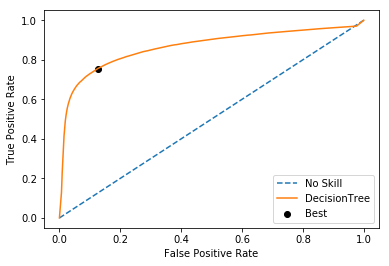

In [57]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# predict probabilities
yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, label='DecisionTree')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Precision-Recall Curve

Best Threshold=0.333333, F-Score=0.700


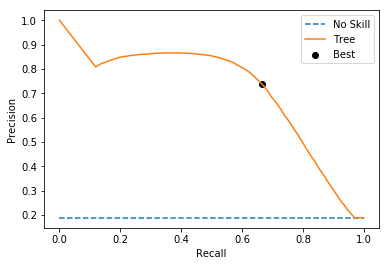

In [59]:
from sklearn.metrics import precision_recall_curve
# predict probabilities
yhat = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, label='Tree')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [60]:
...
# define thresholds
thresholds = np.arange(0, 1, 0.001)

In [61]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
     return (pos_probs >= threshold).astype('int')

In [62]:
...
# evaluate each threshold
yhat = clf.predict_proba(X_test)
probs = yhat[:, 1]
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

In [66]:
...
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.330, F-Score=0.69986


In [67]:
precision_, recall_, proba = precision_recall_curve(y_test, yhat[:, -1])

Text(0.5, 1.0, 'Precision-Recall curve')

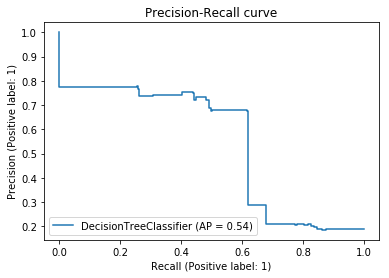

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, plot_precision_recall_curve
disp = plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

In [69]:
optimal_proba_cutoff = sorted(list(zip(np.abs(precision_ - recall_), proba)), key=lambda i: i[0], reverse=False)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in yhat[:, -1]]

In [70]:
recall_score(y_test, roc_predictions)

0.6922764557784455

In [71]:
f1_score(y_test, roc_predictions)

0.6924662611574277

In [72]:
precision_score(y_test, roc_predictions)

0.6926561706449975

In [73]:
accuracy_score(y_test, roc_predictions)

0.8836329124624406

In [ ]:
print("Accuracy Score Before and After Thresholding: {}, {}".format(accuracy_score(y_test, yhat), accuracy_score(y_test, roc_predictions)))
print("Precision Score Before and After Thresholding: {}, {}".format(precision_score(y_test, yhat), precision_score(y_test, roc_predictions)))
print("Recall Score Before and After Thresholding: {}, {}".format(recall_score(y_test, yhat), recall_score(y_test, roc_predictions)))
print("F1 Score Before and After Thresholding: {}, {}".format(f1_score(y_test, yhat), f1_score(y_test, roc_predictions)))

In [ ]:
recall_score(y_test, yhat[:, -1])

In [ ]:
print_metrics(y_test, yhat[:, -1])

### Code from Eva model Results

In [ ]:
def model_results(model):
    with plt.style.context('seaborn-talk'):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
        # Create Confusion Matrix for the test set
        plot_confusion_matrix(model, X_test, y_test, normalize = 'true', ax=ax1,  cmap = 'Greens')
        ax1.grid(False)
        ax1.set_title("Train Confusion Matrix")
        # Create Roc curve for the test and train for TP and FP rates
        plot_roc_curve(model, X_train, y_train, ax=ax2, color=‘green’, name ='Train ROC curve')
        plot_roc_curve(model, X_test, y_test, ax=ax2, color = ‘blue’, name ='Test ROC curve' )
        ax2.plot([0, 1], [0, 1], color=‘black’, lw=2, linestyle=‘-’)
        ax2.set_xlabel(‘False Positive Rate’)
        ax2.set_ylabel(‘True Positive Rate’)
        ax2.set_title(‘Receiver Operating Characteristic (ROC) Curve’)
        plt.show()
        #Create a classification report
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))
        ######***NEW LINE*** Print CV ROC_AUC score, and roc_auc score for test/train
        #Print CV ROC_AUC score
        roc_score_train_cv = cross_val_score(estimator=model, X=X_train,  y=y_train,
                                        cv=StratifiedKFold(shuffle=True), scoring=‘roc_auc’).mean()
        print(f”Mean Cross Validated Roc_Auc Score: {roc_score_train_cv :.0%}“)
        #print roc_auc for test and train
        roc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
        print(f”Train Roc_Auc Score: {roc_score_train :.0%}“)
        roc_score_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        print(f”Test Roc_Auc Score: {roc_score_test :.0%}“)
        accuracy_train = model.score(X_train, y_train)
        accuracy_test = model.score(X_test, y_test)
        print(f”Train Accuracy Score: {accuracy_train :.0%}“)
        print(f”Test Accuracy Score: {accuracy_test :.0%}“)